In [1]:
# The problem of signal separation for a given basis signal and the linear span, defined by the mixture of the signals, is the problem of feature selection.
# However, selecting an optimal set of features is not a problem.
# It is a problem, how to select an exact number of exact features which approximate the target signal with added noise.
# The problem is simplified because the noise is applied one after the signals are mixed.
# The noise is normally distributed and has a relatively small amplitude.
# It does not exceed the minimum signal amplitude.
# The mixture is made with coefficients of the signal attenuation.
#
# The title: Guess Whose Birthdays Are Today?"

In [2]:
# Read the data flies and import functions
import numpy as np
import json
from google.colab import drive
drive.mount('/content/drive')
import sys
f_path = '/content/drive/MyDrive/AlohaCollisionDetector'
sys.path.insert(0,f_path)
# %ls {f_path}

Mounted at /content/drive


In [3]:
f_prefx = '/data/inphase_quadrature_'
with open(f_path + f_prefx + 'data.json') as f:
  data = np.array(json.load(f))
with open(f_path + f_prefx + 'noise.json') as f:
  noise = np.array(json.load(f))
# Read the library files with centroids
iqdata = data[:,0,:] + 1j*data[:,1,:]
iqnoise = noise[:,0,:] + 1j*noise[:,1,:]

In [4]:
# Fill the library with centroids
idx_clusters = {(762, 647, 7, 169, 794, 331, 886, 183, 538, 859), (195, 612, 133, 325, 40, 136, 733, 171, 844, 936, 494, 463, 439, 88, 985, 955, 189, 734), (385, 738, 840, 112, 146, 530, 831), (224, 800, 5, 281, 517, 711, 9, 586, 842, 535, 152, 121, 862), (777, 267, 664, 555, 815, 566, 185, 698, 709, 837, 456, 594, 731, 860, 606, 996, 358, 619, 627), (514, 645, 775, 264, 265, 393, 520, 791, 413, 286, 543, 38, 294, 309, 949, 316, 318, 726, 987, 997, 511), (471, 578, 681, 28, 527, 498, 403, 468, 277, 245, 438, 377, 220, 319), (577, 865, 259, 452, 389, 361, 969, 523, 273, 595, 767, 952, 797, 191), (321, 162, 994, 356, 774, 295, 491, 269, 909, 368, 785, 434, 499, 881), (672, 100, 613, 932, 71, 487, 970, 303, 274, 658, 729), (384, 352, 552, 876, 973, 696, 728, 766, 692, 820, 792, 61, 30, 447), (513, 398, 787, 409, 921, 174, 433, 563, 53, 450, 454, 332, 591, 83, 485, 877, 878, 892, 637, 254, 383), (802, 771, 901, 744, 600, 683, 461, 366, 976, 529, 338, 536, 890, 700, 829, 510, 415), (386, 29, 35, 678, 42, 568, 317, 832, 327, 713, 216, 990, 350, 223, 353, 102, 753, 246, 247), (963, 682, 107, 251, 655, 50, 984, 187), (544, 928, 34, 549, 679, 967, 459, 588, 972, 814, 855, 80, 951, 818, 308, 663, 57), (65, 741, 262, 614, 235, 587, 748, 430, 558, 114, 179, 978, 918, 151, 694, 506, 95), (993, 515, 231, 810, 906, 782, 175, 560, 783, 210, 371, 853, 182, 375, 636, 445), (641, 905, 525, 142, 147, 659, 427, 428, 812, 305, 823, 184, 314, 571, 194, 581, 843, 854, 215, 605, 868, 364, 751, 382), (899, 67, 44, 78, 703, 84, 666, 891, 285, 287), (609, 418, 930, 518, 712, 590, 654, 910, 948, 373, 917, 408, 249, 953, 988, 893, 894), (354, 706, 132, 451, 137, 10, 299, 938, 334, 888, 633, 186, 155, 607), (387, 400, 21, 407, 291, 807, 553, 178, 306, 59, 63, 82, 470, 856, 94, 228, 374, 889, 124), (288, 481, 98, 992, 36, 838, 871, 424, 302, 432, 592, 691, 924), (394, 279, 923, 806, 935, 688, 188, 958, 960, 458, 718, 977, 339, 85, 597, 347, 242, 634, 127), (737, 37, 550, 455, 202, 460, 653, 749, 781, 49, 379, 276, 437, 983, 158, 765, 222, 763), (1, 97, 324, 968, 201, 149, 213, 981, 539), (3, 422, 839, 72, 939, 473, 14, 48, 466, 819, 55, 217, 764), (225, 257, 995, 134, 742, 870, 173, 975, 528, 278, 758, 24, 346, 60, 799), (675, 292, 869, 599, 359, 8, 232, 297, 426, 908, 813, 965, 982, 572, 476, 828, 509, 62), (256, 322, 453, 329, 496, 848, 370, 340, 148, 312, 478), (611, 70, 326, 616, 234, 492, 205, 46, 493, 752, 52, 405, 150, 825, 601, 827, 93), (416, 768, 962, 548, 168, 618, 811, 301, 141, 944, 884, 280, 477), (545, 580, 484, 646, 39, 746, 238, 367, 850, 501, 214, 760, 25), (128, 769, 803, 101, 841, 524, 333, 465, 497, 562, 979, 502, 695, 313, 858, 735), (954, 673, 804, 166, 583, 330, 76, 686, 623, 942, 113, 690, 337, 22, 603, 123, 444, 830), (576, 33, 522, 650, 778, 621, 143, 207, 79, 879, 851, 436, 701), (320, 864, 872, 617, 395, 13, 847, 402, 883, 467, 822, 727, 344, 732, 159), (448, 801, 129, 643, 391, 488, 846, 912, 18, 786, 629), (770, 4, 135, 903, 780, 915, 153, 420, 165, 934, 561, 817, 323, 198, 722, 212, 863, 482, 227, 610, 486, 250, 252), (66, 933, 103, 907, 429, 239, 208, 431, 495, 117, 697, 604, 638), (260, 138, 284, 163, 676, 554, 689, 945, 565, 311, 569, 699, 574, 836, 69, 966, 596, 89, 475, 348, 230), (674, 805, 551, 635, 92, 882, 946, 947, 857, 505, 315, 956, 31), (704, 705, 644, 648, 585, 298, 362, 620, 808, 111, 310, 56, 218, 446), (897, 99, 388, 197, 998, 392, 170, 779, 300, 206, 719, 625, 757, 761, 157), (736, 419, 104, 649, 266, 714, 652, 268, 180, 500, 125, 479), (6, 200, 759, 236, 557, 219, 15, 684, 880, 20, 181, 54, 919, 661, 91, 540, 989), (423, 904, 73, 489, 75, 490, 575, 845, 47, 875, 925, 914, 341, 118, 885, 26, 349, 255), (773, 12, 531, 662, 920, 793, 154, 425, 570, 74, 725, 86, 343, 986, 233, 241, 116, 507, 895), (512, 866, 390, 77, 974, 685, 464, 657, 717, 435, 564, 849, 980, 602), (226, 357, 122, 105, 140, 622, 784, 537, 90, 380, 927), (480, 640, 258, 642, 964, 261, 263, 556, 943, 469, 821, 665, 442, 826, 670), (651, 795, 411, 931, 164, 172, 559, 304, 307, 441, 589, 336, 342, 867, 503, 743, 756, 887, 378), (32, 929, 417, 833, 521, 937, 81, 145, 51, 721, 693, 755, 87, 351), (160, 64, 96, 516, 421, 708, 584, 106, 365, 526, 941, 816, 209, 913, 27, 156, 957), (192, 290, 483, 582, 199, 472, 874, 144, 176, 401, 926, 950, 23, 632, 922, 508, 542, 991), (0, 130, 900, 519, 911, 275, 660, 916, 790, 796, 669, 546, 567, 58, 193, 971, 248, 615, 240, 754, 504), (902, 776, 404, 533, 667, 798, 161, 547, 293, 702, 457, 593, 608, 229, 363, 237, 750, 630, 631), (898, 399, 272, 656, 852, 372, 598, 120, 730, 412, 671), (396, 397, 788, 410, 45, 440, 573, 961, 707, 196, 710, 715, 462, 720, 861, 221, 355, 360, 244, 376), (131, 68, 677, 680, 745, 108, 270, 335, 16, 19, 723, 443, 190, 639), (896, 2, 17, 532, 534, 406, 959, 579, 204, 345, 999, 747, 109, 110, 369, 626, 628, 253, 126), (289, 328, 809, 873, 43, 940, 271, 624, 474, 115, 789, 119, 282, 283, 668, 541, 414), (449, 739, 740, 772, 167, 41, 11, 139, 203, 716, 687, 177, 211, 243, 381)}
# Convert list of sets into dictionary
dict_cluster = {c[0]: list(c[:]) for c in idx_clusters}
# print(dict_cluster)

def is_incluster(key, qry, dict_cluster):
  if key in dict_cluster and qry in dict_cluster[key]:
    return True
  else:
    return False

flag = is_incluster(195, 40, dict_cluster)
print(flag)
flag = is_incluster(195, 7, dict_cluster)
print(flag)

True
False


In [68]:
# @title
from scipy.linalg import lstsq
# IMPORTANT! Returns the "Square of the 2-norm for (b - a x)"

# New variant of Feb 17 % IT IS ONLY IN THIS FILE .ipynb
def find_shiftX_exhaust(x, X, y, max_shift = 11):
  # Semor, two-pametric (scale, shift) self-modeling regression
  # Find the best phase of the scaled vector x, the first column of the matrix X
  # to minimize the eucledian distance err = |X @ b - y|.
  # max_shift is the maximum allowed phase shift in either direction
  # Works for complex-valued vectors
  # For the one-column X run this with X = np.column_stack([x])
  # Returns err, shift of X[:0] and scale of X
  err_min = float('inf')
  best_shift = 0
  len_x = len(x)

  # The shifting subfunction puts zeroes to the both ends of the signal
  def shift_it(x, len_x, shift):
    if shift < 0:
      shifted_x = np.pad(x[:len_x + shift], (abs(shift), 0), 'constant', constant_values=0)
    else:
      shifted_x = np.pad(x[shift:], (0, shift), 'constant', constant_values=0)
    return shifted_x

  # Scale x0 in X according to y
  def lsq_xy(x, X, y):
    if X.size == 0:
      xX = np.column_stack([x])
    else:
      xX = np.column_stack((x, X))
    b, err, rank, s = lstsq(xX, y)
    if s is None:
      print('Warning: find_shiftX_exhaust -> lsq_xy -> lstsq has collinear vectors, err = 0.')
      raise ValueError('find_shiftX_exhaust -> lsq_xy -> lstsq has collinear vectors')
      err = 0 # FIXIT
    return err, b # Distance and linear model parameters

  # Exhaustive search for +- max_shift
  for shift in range(- max_shift, max_shift + 1):
    shifted_x = shift_it(x, len_x, shift)
    err, b = lsq_xy(shifted_x, X, y) # Currest distance
    # print('Err', err, 'min', err_min, 'Shift', shift)
    if err < err_min:
      err_min = err
      best_b = b
      best_shift = shift
  return err_min, best_b, best_shift

def shift_x(x, shift):
  # Shift a vector to several positions, replacing the gap with zeroes
  if shift < 0:
    sft_x = np.pad(x[:len(x) + shift], (abs(shift), 0), 'constant', constant_values=0)
  else:
    sft_x = np.pad(x[shift:], (0, shift), 'constant', constant_values=0)
  return sft_x

def shift_X(X, shifts):
  # Call shift_x for each column in the matrix X
  for j in range(len(shifts)):
    X[:,j] = shift_x(X[:,j], shifts[j])
  return X

def scale_X(X, b): # Do you really neeed this one?
  # Make a linear forecast
  return X @ b

'''
def scale_separate(data, coeffs):
  # Each row of the data is a complex vector to scale
  # Scale to max(abs) real and imag parts independently
  # Scale each vecor by real coefficient
  data_scaled = np.empty(data.shape, dtype=complex)
  for signal, coeff, i in zip(data, coeffs, range(data)):
    max_real = np.max(np.abs(signal.real))
    if max_real == 0:
       signal_real = signal.real
    else:
      signal_real = signal.real / max_real
    max_imag = np.max(np.abs(signal.imag))
    if max_imag == 0:
       signal_imag = signal.imag
    else:
      signal_imag = signal.imag / np.max(np.abs(signal.imag))
    signal_scaled = coeff * signal_real + 1j * coeff * signal_imag
    data_scaled[i] = signal_scaled
  return data_scaled

def scale_complex(data, coeffs):
  # Each row of the data is a complex vector to scale
  # Scale to max(abs) real and imag parts so that
  # The amplitude is the root mean square of I and Q the signal is coeff.
  data_scaled = np.empty(data.shape, dtype=complex)
  for signal, coeff, i in zip(data, coeffs, range(data)):
    signal_rms = np.sqrt(np.mean(np.abs(signal)**2))
    if signal_rms > 0:
      signal_scaled = signal * (coeff / signal_rms)
    else:
      signal_scaled = signal # No scaling for zero
    data_scaled[i] = signal_scaled
  return data_scaled
'''

def scale_separate(signal, coeff):
  # The signal is a complex vector to scale
  # Scale to max(abs) real and imag parts independently
  # Scale vecor by real coefficient
  max_real = np.max(np.abs(signal.real))
  if max_real == 0:
    signal_real = signal.real
  else:
    signal_real = signal.real / max_real
  max_imag = np.max(np.abs(signal.imag))
  if max_imag == 0:
    signal_imag = signal.imag
  else:
    signal_imag = signal.imag / np.max(np.abs(signal.imag))
  signal_scaled = coeff * signal_real + 1j * coeff * signal_imag
  return signal_scaled

def scale_complex(data, coeff):
  # The signal is a complex vector to scale
  # Scale to max(abs) real and imag parts so that
  # The amplitude is the root mean square of I and Q the signal is coeff.
  signal_rms = np.sqrt(np.mean(np.abs(signal)**2))
  if signal_rms > 0:
    signal_scaled = signal * (coeff / signal_rms)
  else:
    signal_scaled = signal # No scaling for zero
  return signal_scaled

In [23]:
# @title
# Import the local functions, plots, and utilities
# from functions import *
# from utils import plt_fonts(plt, xlabel, ylabel)
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 5))
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 12#24
plt.rcParams['ytick.labelsize'] = 12#24
plt.rcParams['legend.fontsize'] = 12#24
plt.rcParams['axes.labelsize'] = 10#24

# Check the centroids and clusters
def plt_clust_Xy(X, y, idx_X = None, idx_y = None):
# Plot (separated real, imag plot) all signals of the matrix X as a cluster
# and the signal y over it as either a centriod or a target.
  if len(X.shape) == 1:
    X = np.column_stack([X])

  # plt.rcParams['text.usetex'] = True
  plt.rcParams['font.family'] = 'DejaVu Serif'
  plt.rcParams['lines.linewidth'] = 2
  plt.rcParams['xtick.labelsize'] = 12#24
  plt.rcParams['ytick.labelsize'] = 12#24
  plt.rcParams['legend.fontsize'] = 12#24
  plt.rcParams['axes.labelsize'] = 10#24

  idx_X = list(range(X.shape[0])) if idx_X is None else idx_X
  idx_y = -1 if idx_y is None else  idx_y

  for i in range(len(idx_X)):
    plt.plot(X.real[i], label = str(idx_X[i]))
  plt.plot(y.real, label = str(idx_y), color='black', linewidth=3)

  # Finalize the plot (real)
  plt.ylabel('Amplitude, V (real)', fontname='DejaVu Serif')
  plt.xlabel('Time ticks', fontname='DejaVu Serif')
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  # plt.savefig(f_path+'/data/fig_clust_'+str(idx_y[0])+'_real.png', dpi=300, bbox_inches='tight')
  plt.show()

  for i in range(len(idx_X)):
    plt.plot(X.imag[i], label = str(idx_X[i]))
  plt.plot(y.imag, label = str(idx_y), color='black', linewidth=3)

  # Finalize the plot (imaginarty)
  plt.ylabel('Amplitude, V (imaginary)', fontname='DejaVu Serif')
  plt.xlabel('Time ticks', fontname='DejaVu Serif')
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  # plt.savefig(f_path+'/data/fig_clust_'+str(idx_y[0])+'_imag.png', dpi=300, bbox_inches='tight')
  plt.show()
  return

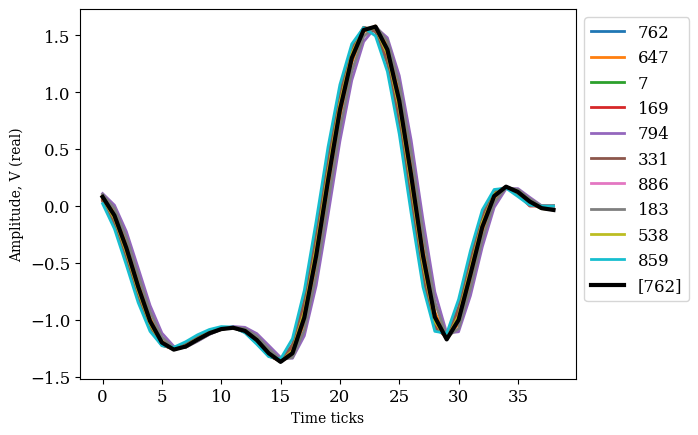

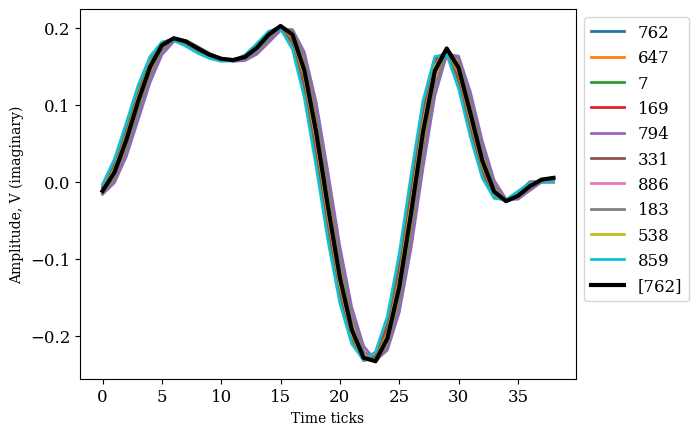

Clusters, total items: 64 995


In [57]:
# Variant 1 for a single memeber
# Plot all clusters, just checking
for idx_c in idx_clusters:
  X = iqdata[idx_c,:].transpose()
  y = iqdata[idx_c[0],:]
  Y1mat = np.empty(X.shape, dtype=complex)

  for j in range(len(idx_c)):
    x = X[:,j]
    err_min, best_b, best_shift = find_shiftX_exhaust(x, np.empty((0)), y, 5)
    _ = shift_x(X[:,j], best_shift)
    y1 = np.column_stack([_]) @ best_b
    Y1mat[:,j] = y1
  plt_clust_Xy(Y1mat.transpose(), y, list(idx_c), [idx_c[0]])
  break # Demo break
print('Clusters, total items:', sum(1 for _ in idx_clusters), sum(len(i) for i in idx_clusters))

In [73]:
# Variant 2 for the whole cluster
for idx_c in idx_clusters:
  X = iqdata[idx_c,:].transpose()
  y = iqdata[idx_c[0],:]

  added_shift = list() # np.empty((0,)) # Var2
  added_basis = np.empty((len(y), 0), dtype=complex) # Var2
  for j in range(len(idx_c)):
    x = X[:,j]
    # Add some noise to avoid multicollinearity
    noise = np.random.normal(loc=0, scale=0.1, size=added_basis.shape) + 1j * np.random.normal(loc=0, scale=0.1, size=added_basis.shape)
    # print('x', x.shape, 'ab', added_basis.shape, 'noi', noise.shape, 'y', y.shape)
    err_min, best_b, best_shift = find_shiftX_exhaust(x, added_basis + noise, y, 7)
    # Store results
    added_basis = np.column_stack((added_basis, x)) # store non-shifted item
    added_shift.append(best_shift)

  # Plot source data
  ##plt_clust_Xy(added_basis.transpose(), y, list(idx_c), [idx_c[0]])

  # Plot shifted data
  X_shifted = shift_X(X, added_shift)
  ##plt_clust_Xy(X_shifted.transpose(), y, list(idx_c), [idx_c[0]])

  # Plot shifted data with source noise
  idx_y_src_noise = np.random.choice(len(iqnoise), 1)[0]
  y_src_noise = iqnoise[idx_y_src_noise]
  # plt_clust_Xy(X_shifted.transpose(), y_src_noise, list(idx_c), [idx_y_src_noise])

  # Plot scaled and shifted data
  noise = np.random.normal(loc=0, scale=0.05, size=X_shifted.shape) + 1j * np.random.normal(loc=0, scale=0.05, size=X_shifted.shape)
  b = np.linalg.lstsq(X_shifted + noise, y, rcond=None)[0]
  y1 = X_shifted @ b # Restored signal
  # plt_clust_Xy(np.column_stack([y1+0.1]).transpose(), y) # Shift y1 a little to show
  # break # Demo break


In [ ]:
# Analyse the dimensionality of the basis with SVD
#print(iqlib.shape)
A = iqlib.transpose()
print('The (length) and the (number of signals) =', A.shape)

# Plot singular values
U, Lambda, Vt = np.linalg.svd(A, full_matrices=True)
print('First singular values', Lambda[list(range(17))])
#TODO uncomment for the demo mode
#plt.plot(Lambda, marker='o', linestyle='-', color='b', label='Lambda')
#plt.xlabel('Index', fontname='DejaVu Serif')
#plt.ylabel('Singular Value', fontname='DejaVu Serif')
#plt.legend()
#plt.show()

In [74]:
# Prepare a four-class classification dataset: noise, one, two and tree+ transmitters
# Assume that the signal amplitude attenuates proportionally to the distance to the reader and set
ATTEN = 0.5 # Fix the attenuation (assume the original signals already attenuate)
N = 1000 # Each class sample size
CLS = 4 # Number of classes
MIX_MAX = 10 # Maximum number of mixtures signals
# Create empty datasets to fill with the mixures
Xsrc4 = np.empty((0, iqdata.shape[1]), dtype=complex)
Ysrc4 = np.empty(0)
Yidx16 = -1 * np.ones((0, MIX_MAX)) # Indexes of the mixed signals (-1 means no signal)
# Randomly select indices from the sample set
n = len(iqdata) # Occurs below frequently
for c in range(CLS): # For 4 classes
  idx = np.random.choice(n, N, replace=False) # Choose index of the noise sample
  xmixture = iqnoise[idx] # Noise presents in any class
  xmix_idx = -1 * np.ones((len(idx), MIX_MAX)) # Indexes of the mixed signals (-1 means no signal)

  # CLS is the number of the components in the mixture
  if c == 3:
    cls_mix = MIX_MAX # Let 3,4, or 5 mix together with probability 1/3? FIXIT
  else:
    cls_mix = c
  for c_mix in range(cls_mix):
    print('Class:', c, 'In mixture:', c_mix+1)
    idx = np.random.choice(n, N, replace=False) # Random data indices
    xmix_idx[:, c_mix] = idx # Store indexes of the original signals in the mixture
    incoming = ATTEN * iqdata[idx] # Store attenuated signals
    # Attenuation for now is equal due to the previoius signal scaling FIXIT
    # For the class 3 the number of mixed signals is unknown
    if c_mix > 2: # Random mixture with probability 1/3 for a single row in the matrix
      idx_local_zeroed = np.random.choice(list(range(len(idx))), np.array([N // (1/0.7)], dtype = int) , replace=False)
      incoming[idx_local_zeroed,:] = 0
      xmix_idx[idx_local_zeroed, c_mix] = -1 # Means no signal in the mixture
    # Make the mixture
    xmixture = xmixture + incoming # Add to the mixture
    # xmix_idx = xmix_idx # Already all set!
    # Plot the dataset to get an overview
    # plt.imshow(incoming.real[900:999], cmap="viridis", interpolation="nearest") #Xsrc4.imag[950:1050,:]
    # plt.show()
  Xsrc4 = np.append(Xsrc4, xmixture, axis=0) # Store a mixture
  Yidx16 = np.append(Yidx16, xmix_idx, axis=0)
  Ysrc4 = np.append(Ysrc4, c * np.ones(N)) # Store the class label

# Plot the source and the mixture
i_show = np.random.choice(len(Ysrc4), 1)[0]
# plt.plot(Xsrc4[i_show,:])
# plt_show(plt, str(Yidx16[i_show,:]), "Amplitude")

Class: 1 In mixture: 1
Class: 2 In mixture: 1
Class: 2 In mixture: 2
Class: 3 In mixture: 1
Class: 3 In mixture: 2
Class: 3 In mixture: 3
Class: 3 In mixture: 4
Class: 3 In mixture: 5
Class: 3 In mixture: 6
Class: 3 In mixture: 7
Class: 3 In mixture: 8
Class: 3 In mixture: 9
Class: 3 In mixture: 10


In [113]:
# Alternative four-class classification accoriding to the signal-noise ration
MAX_MIX = 6 # Maximum number of mixtures signals
MAX_AMP = 0.3 # V Minimun and maxium RMS amlitude of I/Q data signal
MIN_AMP = 1.2 # V

new_data = np.empty((0, iqdata.shape[1]), dtype=complex)
new_labels = []
new_srces = []
new_cores = []
new_coefs = []

# Generate four classes: 0, 1, 2, 3, probably disbalanced.
new_cls_size = [100,100,100,100]

# For each class
for cls,  cls_sample_size in enumerate(new_cls_size):
  # Generate the sample set as a mixture of signals
  for _ in range(cls_sample_size):
    # For each now item in the sample set prepare mixture
    mixture = iqnoise[np.random.choice(iqnoise.shape[0])] # A mixtire has its noise
    # How many items in the mixture?
    if cls < 3: # 0: just noise, 1: single signal, 2: two signals
      cls_mix = cls
    else:
      cls_mix = np.random.choice(list(range(3,MAX_MIX))) # Several signals

    # The generaton from two or more same sources is prohibited,
    # each transmitter sends its own code
    idx_core = np.random.choice(list(dict_cluster.keys()), cls_mix, replace=False)
    idx_src = []
    coeffs = []
    for idx_c in idx_core:
      idx_s = np.random.choice(dict_cluster.get(idx_c), 1, replace=False)[0]
      idx_src.append(idx_s)
      # Prepare a signal in the mixture
      coeff = np.random.uniform(MIN_AMP, MAX_AMP, size=1)
      coeffs.append(coeff) # Store coeff
      signal = iqdata[idx_s]
      signal = scale_complex(signal, coeff)
      # signal = scale_separate(signal, coeff)
      mixture = mixture + signal
    # Store all: mixture, its class, its sources, its coeffs
    new_data = np.vstack((new_data, mixture))
    new_labels.append(cls)
    new_srces.append(idx_src)
    new_cores.append(idx_core)
    new_coefs.append(coeffs)

    # Plot the added mixture
    #plt.plot(signal.real, label = 'src')
    #plt.plot(signal1.real, label = 'ready', c='r')
    #plt.legend()
    #plt.show()
    #plt.plot(signal.imag, label = 'src')
    #plt.plot(signal1.imag, label = 'ready', c='r')
    #plt.legend()
    #plt.show()
    # break

# TODO reform almost all np to list of list

#Xsrc4
#Yidx16
#Ysrc4

In [94]:
idx_core = [13, 56, 78]
for i, idx in enumerate(idx_core):
  print(i, idx)


0 13
1 56
2 78


Index in the dataset 3456
[405. 824. 141.  -1. 312.  -1.  -1.  -1. 617.  -1.]


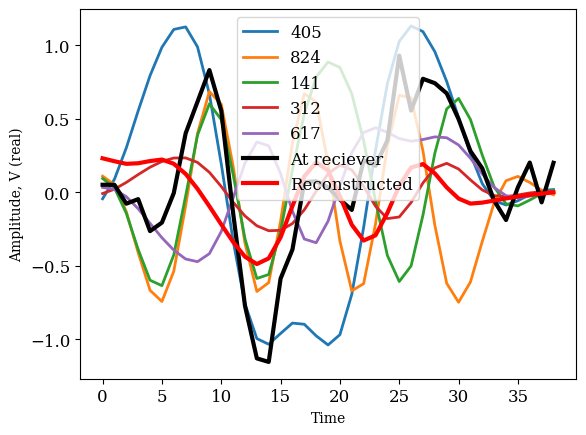

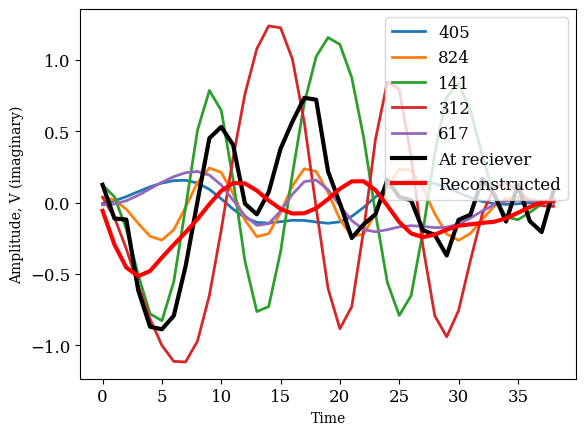

In [196]:
# The is a matrix A is the basis. Tts column, the centroids, are the fearures.
# The mixed signal is the target. Select the featires that approximate the target

# Print the mixture and the source signals
i_show = 3456 # np.random.choice(len(Ysrc4), 1)[0] # 2909 # 3092
print('Index in the dataset', i_show)
mix_idx = Yidx16[i_show,:]
mixture = Xsrc4[i_show,:]
mix_cls = [int(num) for num in mix_idx if num > -1]
print(mix_idx)

#-------------------------------------------------------------------------------
# Reconstruct the known basis
idx_j = [int(num) for num in mix_idx if num > -1]
added_shift = list()
added_basis = np.empty((len(mixture), 0), dtype=complex)
for j in idx_j:
  x = iqdata[j] # Here will be the basis
  err_min, best_b, best_shift = find_shiftX_exhaust(x, added_basis, y, 7)
  added_basis = np.column_stack((added_basis, x)) # store non-shifted item
  added_shift.append(best_shift)

X_shifted = shift_X(added_basis, added_shift)
b = np.linalg.lstsq(X_shifted, mixture, rcond=None)[0]
y1 = X_shifted @ b # Restored signal
#-------------------------------------------------------------------------------

for m in [int(num) for num in mix_idx if num > -1]:
  plt.plot(iqdata.real[m], label=str(m))
plt.plot(mixture.real, color='black', linewidth=3, label = 'At reciever')
plt.plot(y1.real, color='red', linewidth=3, label = 'Reconstructed')
plt.xlabel('Time', fontname='DejaVu Serif')
plt.ylabel('Amplitude, V (real)', fontname='DejaVu Serif')
plt.legend()
plt.show()

for m in [int(num) for num in mix_idx if num > -1]:
  plt.plot(iqdata.imag[m], label=str(m))
plt.plot(mixture.imag, color='black', linewidth=3, label = 'At reciever')
plt.plot(y1.imag, color='red', linewidth=3, label = 'Reconstructed')
plt.xlabel('Time', fontname='DejaVu Serif')
plt.ylabel('Amplitude, V (imaginary)', fontname='DejaVu Serif')
plt.legend()
plt.show()


In [208]:
# The first cell
# There given
y = mixture
answer = [837, 31]
answer = [405, 824, 141, 312, 617]

# ERR_THRESHOLD = 2.5
ERR_NUMS = 36
n_basis = len(dict_cluster) # 64

err_lst = {frozenset():np.inf} # Empty dictionary of {indices: error}
par_lst = err_lst.copy() # {indices: parameters} slift for each column in the basis
err_new = dict() # Updated dictionary

In [209]:
def shift_X(X, shifts):
  # Call shift_x for each column in the matrix X
  for j in range(len(shifts)):
    X[:,j] = shift_x(X[:,j], shifts[j])
  return X

In [213]:
for idx in err_lst.keys():
  # print('Append to the indices:', idx)
  idx_basis = set(dict_cluster.keys())
  for j in idx_basis:  # The whole set of features
    # Append indices of the features
    idx_cp = set(idx)
    idx_cp.add(j)
    # print(idx_cp)
    if frozenset(idx_cp) in err_lst.keys():
      #print('Already in the dictionary:', idx_cp)
      continue
    # Compute the error and add it to the dictionary
    x = iqdata[j] # Get the basic from the source dataset
    if not idx:
      X = np.empty((0))
    else:
      X = iqdata[list(idx),:].transpose() # Get the basis from the source dataset
      X = shift_X(X, [par_lst.get(idx)])
    err, b0, s0 = find_shiftX_exhaust(x, X_shifted, y)
    # print('Error', err)
    err_new[frozenset(idx_cp)] = err
    par_lst[frozenset(idx_cp)] = s0 # Store shift for the future
#--- end forfor

# Print the new (updated) dictionary
#print('Length of the dictionary:', len(err_new))
#for key, err in err_new.items():
#    print(f"Set:", list(key), "error:", err)

# The whole distionary
#err_srt = {k: v for k, v in sorted(err_new.items(), key=lambda item: item[1])}
#err_plt = np.array([err for err in err_srt.values()])
#plt.plot(err_plt, marker='o', linestyle='-', color='b', label='Errors')
#plt.xlabel('Best candidates', fontname='DejaVu Serif')
#plt.ylabel('Error', fontname='DejaVu Serif')
#for i, (key, err) in enumerate(err_srt.items()):
#  plt.text(i, err, str(list(key)), horizontalalignment='center', verticalalignment='bottom')
#plt.legend()
#plt.show()


# Filter the best variants
err_srt = {k: v for k, v in sorted(err_new.items(), key=lambda item: item[1])}
err_lst = dict(list(err_srt.items())[:ERR_NUMS]) # Cut the rest
# Print filtered dictionary
for key, err in err_lst.items():
    print(f"Set:", list(key), "error:", err)

#err_plt = np.array([err for err in err_lst.values()])
#plt.plot(err_plt, marker='o', linestyle='-', color='b', label='Errors')
#plt.xlabel('Best candidates', fontname='DejaVu Serif')
#plt.ylabel('Error', fontname='DejaVu Serif')
#for i, (key, err) in enumerate(err_lst.items()):
#  plt.text(i, err, str(list(key)), horizontalalignment='center', verticalalignment='bottom')
#plt.legend()
#plt.show()

for req in answer:
  for idx in err_lst.keys():
    if is_incluster(key, req, dict_cluster):
      print('================True:', req)




  # print('Append to the indices:', idx)

Set: [320] error: 4.65251866829491
Set: [320, 256] error: 4.65251866829491
Set: [320, 641] error: 4.65251866829491
Set: [320, 385] error: 4.65251866829491
Set: [320, 902] error: 4.65251866829491
Set: [320, 384] error: 4.65251866829491
Set: [320, 394] error: 4.65251866829491
Set: [320, 651] error: 4.65251866829491
Set: [320, 1] error: 4.65251866829491
Set: [320, 512] error: 4.65251866829491
Set: [320, 386] error: 4.65251866829491
Set: [320, 260] error: 4.65251866829491
Set: [320, 672] error: 4.65251866829491
Set: [320, 802] error: 4.65251866829491
Set: [320, 160] error: 4.65251866829491
Set: [320, 289] error: 4.65251866829491
Set: [320, 288] error: 4.65251866829491
Set: [320, 675] error: 4.65251866829491
Set: [320, 674] error: 4.65251866829491
Set: [320, 899] error: 4.65251866829491
Set: [320, 898] error: 4.65251866829491
Set: [320, 773] error: 4.65251866829491
Set: [320, 448] error: 4.65251866829491
Set: [320, 577] error: 4.65251866829491
Set: [320, 66] error: 4.65251866829491
Set: [32